## 作業
在鐵達尼資料集中，   
可以用今天範例中提到的三種辨識異常值的方法，  
以 training data 為資料集。  
1.觀察票價是否有異常值的現象?  
2.你覺得找出的異常是真的異常? 你覺得需要做處理嗎?  
(試著講出自己的想法。)  


### 資料
鐵達尼號 train 資料集


In [10]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn  as sns
from scipy import stats
import math
import statistics
#讓圖可以在 jupyter notebook顯示
%matplotlib inline


In [11]:
df_train = pd.read_csv("Titanic_train.csv")

### 探索性分析:
*  觀察-是否有異常值  
我們來觀察一下 Fare 變數吧!!

## Q1:觀察票價是否有異常值的現象?

32.2042079685746
49.693428597180905


C:\Users\Brandon\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


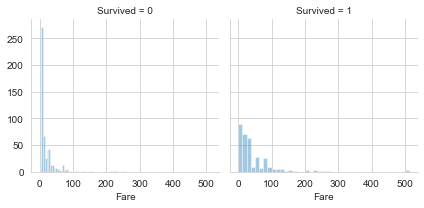

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [16]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn  as sns
from scipy import stats
import math
import statistics
#讓圖可以在 jupyter notebook顯示
%matplotlib inline
df_train = pd.read_csv("Titanic_train.csv")
#方法1 進行一個描述性的統計（規定範圍），從而檢視哪些值是不合理的（範圍以外的值）。
print(df_train['Fare'].mean()) #age平均
print(df_train['Fare'].std()) #age標準差
# 連續型用分布圖行來看
sns.set_style('whitegrid')
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Fare', kde=False)
plt.show()
#先透過 計算統計值， 分別呈現數量，年齡平均，標準差，最大值和最小值。
print(df_train['Fare'].describe()) #age平均
# 透過這樣的方式，最大值512明顯超出合理範圍

## 方法1
* 進行一個描述性的統計（規定範圍），從而檢視哪些值是不合理的（範圍以外的值）。  


## 方法 2
* 進行3倍標準差原則的計算，從而檢視哪些值是可疑的異常值。  


In [20]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn  as sns
from scipy import stats
import math
import statistics
#讓圖可以在 jupyter notebook顯示
%matplotlib inline
df_train = pd.read_csv("Titanic_train.csv")
# 創建一個函數，計算在這個資料中， ys:資料，times : 幾倍標準差，找出在這樣條件下的異常值。
def outliers_z_score(ys,times):
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > times)

out_index=outliers_z_score(df_train['Fare'],3)
print(out_index[0])
print("用第二種方法的找出的 outlier 有哪些?")
print(df_train.loc[out_index[0],'Fare'])
#  所以用這個方法，找出的 outlier 就是少數族群

[ 27  88 118 258 299 311 341 377 380 438 527 557 679 689 700 716 730 737
 742 779]
用第二種方法的找出的 outlier 有哪些?
27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: Fare, dtype: float64


## 方法3-盒鬚圖判別法(IQR method)

In [22]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn  as sns
from scipy import stats
import math
import statistics
#讓圖可以在 jupyter notebook顯示
%matplotlib inline
df_train = pd.read_csv("Titanic_train.csv")
import numpy as np
# 透過一個函數來判斷是否為異常值
def outliers_iqr(ys,times):
    #注意 使用 np.percentile 要去除 nan 要不然計算出來會錯誤，所以我們採用下者的程式 np.nanpercentile
    #quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    quartile_1, quartile_3 = np.nanpercentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * times)
    upper_bound = quartile_3 + (iqr * times)
    return np.where((ys > upper_bound) | (ys < lower_bound))
out_index2=outliers_iqr(df_train['Fare'],1.5)
print(out_index2[0])
print("用第三種方法的找出的 outlier 有哪些?(1.5 倍IQR)")
print(df_train.loc[out_index2[0],'Fare'])

[  1  27  31  34  52  61  62  72  88 102 118 120 124 139 151 159 180 195
 201 215 218 224 230 245 256 257 258 262 268 269 275 290 291 297 299 305
 306 307 310 311 318 319 324 325 332 334 336 337 341 366 369 373 375 377
 380 385 390 393 412 435 438 445 453 484 486 496 498 504 505 520 527 537
 540 544 550 557 558 581 585 587 591 609 627 641 645 655 659 660 665 679
 681 689 698 700 708 716 730 737 741 742 745 759 763 765 779 789 792 802
 820 829 835 846 849 856 863 879]
用第三種方法的找出的 outlier 有哪些?(1.5 倍IQR)
1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64


In [ ]:
畫盒鬚圖
方法：利用matplotlib包中axes物件的boxplot()方法。 透過 whis 來設定 IQR 的倍數

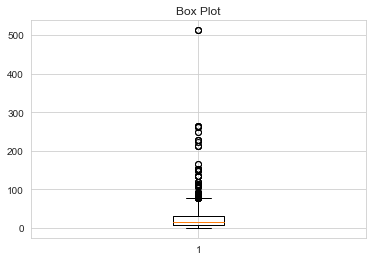

In [23]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn  as sns
from scipy import stats
import math
import statistics
#讓圖可以在 jupyter notebook顯示
%matplotlib inline
df_train = pd.read_csv("Titanic_train.csv")
# 使用np.isnana(data)，找出在 Fare中的遺失值，然後逐位反轉，讓遺失值為 0,則可以透過索引的方式，濾掉遺失值。
plt.boxplot(df_train['Fare'][~np.isnan(df_train['Fare'])],whis=2)
plt.title('Box Plot')
plt.show()

## Q2:你覺得找出的異常是真的異常? 你覺得需要做處理嗎?


In [ ]:
可以看出異常值大多為高票價的部分，要考慮實際情況，若當時票價確實賣這麼貴的話，屬於業務部門的特定動作導致的資料分佈異常，不能拋棄數值。

這些異常值的處理方法:
聚類：

我們也可以用決策樹直接處理帶有異常值的數據（決策樹基本不會受到異常值和缺失值的影響），或是對不同的觀測值分配權重。


替換：

在替換前需判斷為真異常還是偽異常，如果是真異常，類似替換缺失值，我們也可以替換異常值。我們可以使用均值、中位數、眾數替換方法。


分離對待：

如果異常值的數目比較多，在統計模型中我們應該對它們分別處理。一個處理方法是異常值一組，正常值一組，然後分別建立模型，最後對結果進行合併。
#可以在選擇模型使用較不會被離群值影響的模型(如Decision tree, Random forest...)。

#或者是票價高低另外成立一個獨立的feature，以category的方式表達高票價及低票價。